# Procesamiento de imágenes · Tarea 5

Cuando una imagen no se toma adecuadamente, lo ideal sería volver a tomarla. Sin embargo, resulta complicado lograr esto si el evento ya ocurrió hace un tiempo. En casos como este resulta útil mejorar la imagen con la ayuda del procesamiento de imágenes.

Tenemos una radiografía que tiene _motion blur_ porque la mochila se estaba moviendo mientras la fotografía fue tomada. Podemos estimar la función de degradación para intentar recuperar información de la imagen original.

### Importante
* Lee atentamente las instrucciones y todo el código.
* Ejecuta las celdas en orden.
* Escribe tu código en las celdas que lo soliciten.
* Usa los nombres de variables que te pidan.
* Confirma que tu código esté correcto corriendo las celdas que dicen "Chequeo".
* Si el chequeo alerta que hay alguna variable incorrecta, vuelve atrás y arréglala. No hay penalización por esto.


### Imagen degradada
<img src="xray_motion.png" alt="drawing" width="600"/>

### Imagen restaurada
<img src="xray_restored.png" alt="drawing" width="600"/>

Esta tarea será distinta a las anteriores. Serás libre de cumplir el objetivo a tu mandera. Puedes usar la librería y el código que desees.

[Aquí](https://scikit-image.org/docs/stable/auto_examples/filters/plot_restoration.html) y [aquí](https://docs.opencv.org/4.5.2/d1/dfd/tutorial_motion_deblur_filter.html) hay unos links que podrían servirte.

##### Importamos las librerías para el chequeo

In [1]:
import checker
import importlib

## Primer problema

Nuestro fotógrafo, Alex, es fanático de los autos y quisiera saber la patente de este para conocer en detalle el modelo del auto. Lamentablemente, movió la cámara al sacar la foto y la patente quedó ilegible.

<img src="car_motion.png" alt="drawing" width="400"/>

Restaura la imagen para ayudar a Alex a recuperar la patente del auto. La imagen borrosa está almacenada en ```car_motion.png```. Escribe la patente que descubras (sin guiones ni espacios) en ```plate_1``` y la imagen resultante (como un ```numpy.ndarray```) en ```img_restored_1```. ¡Suerte!

Tip: si cargas la imagen con ```cv2.imread```, recuerda que los pixeles retornados son ```np.uint8``` y están entre 0 y 255. Algunas funciones de restauración reciben _floats_ entre 0 y 1 por lo que podrías necesitar modificar la imagen.

**Tip:** analiza las esquinas de la imagen para descubrir qué degradación fue aplicada.

In [2]:
# Escribe tu código en las siguientes líneas
checker.print_tip_1()

Tip: la degradación de la primera imagen es diagonal de 20 pixeles.


In [3]:
checker.print_tip_2()

Tip: la degradación de la segunda imagen es Gaussiana con sigma igual a 10.


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.restoration as restoration
from scipy.signal import fftconvolve, convolve2d
from scipy.signal import deconvolve as scipy_deconvolve
from   matplotlib.colors import LogNorm
from   scipy.fftpack     import fft2,ifft2,fftshift,ifftshift

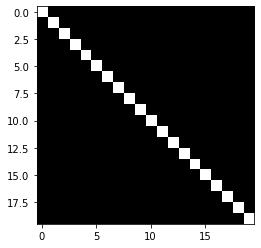

In [5]:
len_degradation_kernel = 20
diag_kernel = np.eye(len_degradation_kernel) / len_degradation_kernel
plt.imshow(diag_kernel, cmap='gray')

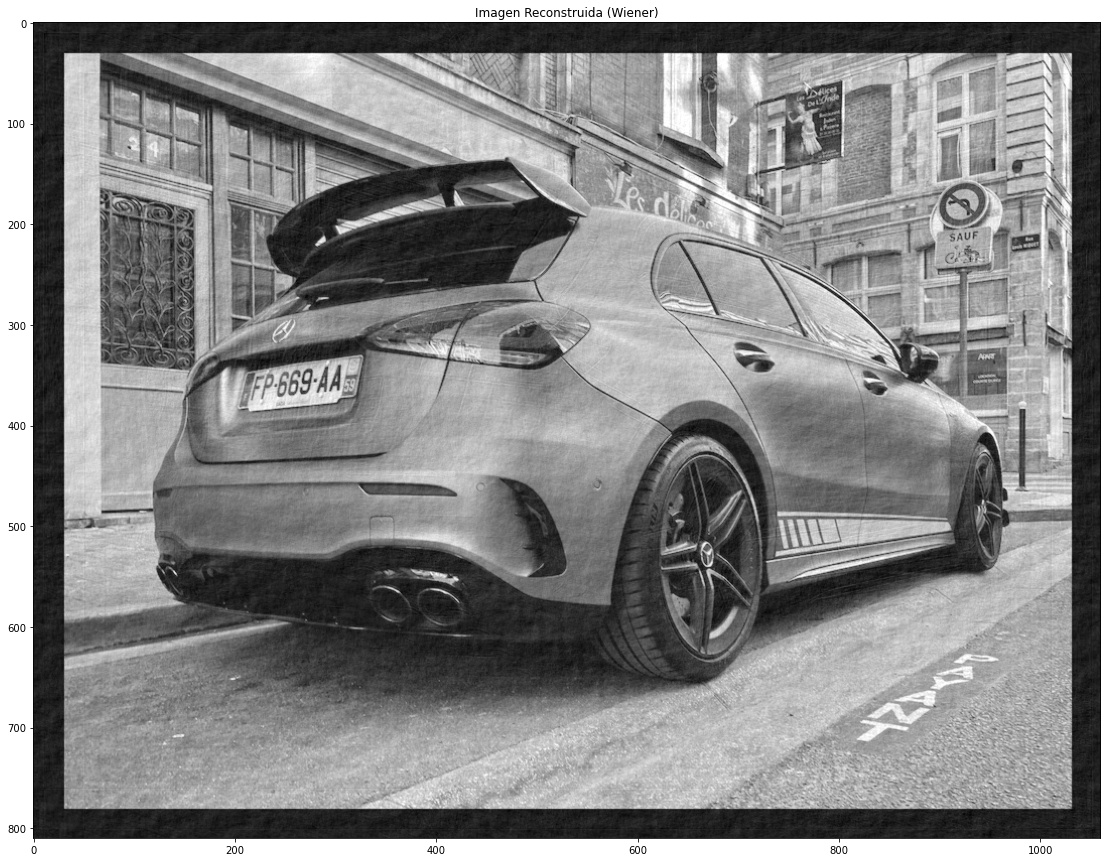

In [6]:
degradada_1=cv2.imread('car_motion.png',cv2.IMREAD_GRAYSCALE)

img_restored_1,_=restoration.unsupervised_wiener(degradada_1/255,diag_kernel)

plt.figure(figsize=(20,15))
plt.title('Imagen Reconstruida (Wiener)')
plt.imshow(img_restored_1,cmap='gray')
plt.show()

In [7]:
plate_1='FP669AA'

##### Chequeo

In [8]:
importlib.reload(checker)

assert checker.check_license_plate_1(plate_1)
assert checker.check_img_1(img_restored_1)

Patente correcta. ¡Puedes seguir adelante!
Imagen correcta. ¡Puedes seguir adelante!


## Segundo problema

Alex aún no aprende a sacar fotos. Ahora no movió la cámara pero olvidó enfocar, por lo que nuevamente no podemos leer la patente.

<img src="car_gaussian.png" alt="drawing" width="400"/>

Restaura la imagen para ayudar a Alex a recuperar la patente del auto. La imagen borrosa está almacenada en ```car_gaussian.npy```. Escribe la patente que descubras (sin guiones ni espacios) en ```plate_2``` y la imagen resultante (como un ```numpy.ndarray```) en ```img_restored_2```. ¡Suerte!

**¡Importante!** La imagen está almacenada en un archivo ```.npy```, por lo que deberás usar una función distinta a ```cv2.imread```para cargarla.


**Tip:** si le aplicáramos la misma degradación a un punto, se vería como la siguiente imagen.
<img src="psf.png" alt="drawing" width="400"/>

In [9]:
color_image=np.load('car_gaussian.npy')

gray_image=cv2.cvtColor(color_image,cv2.COLOR_BGR2GRAY)

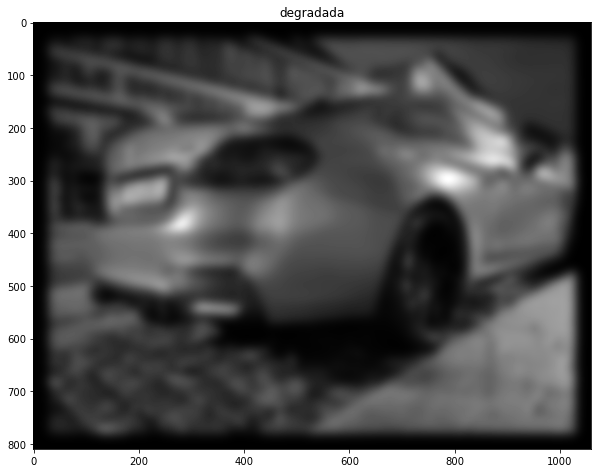

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(gray_image,cmap='gray')
plt.title('degradada')
plt.show()

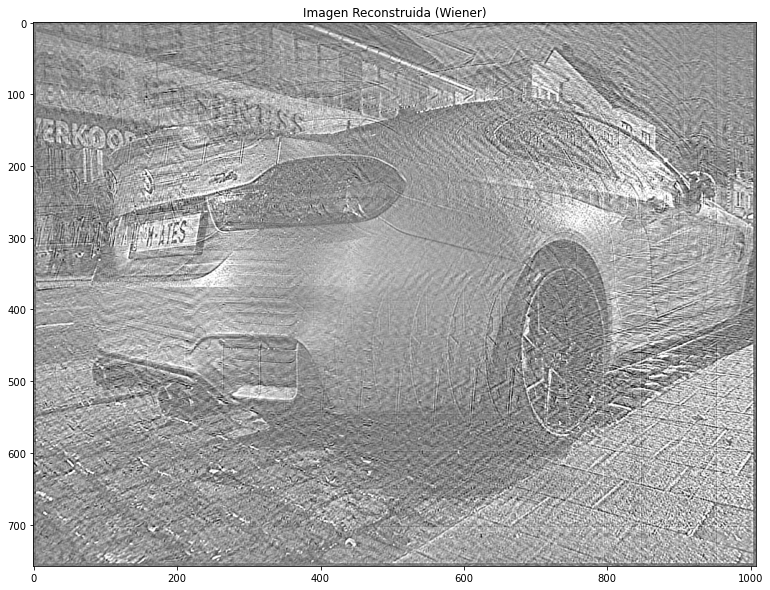

In [20]:
size=52
sigma=10

x, y=np.mgrid[-size // 2   :size // 2   ,-size // 2  :size // 2  ]
kernel=np.exp(-((x**2+y**2)/(2.0*sigma** 2)))
kernel=kernel / kernel.sum()


img_restored_2,_=restoration.unsupervised_wiener(gray_image  ,kernel)

m = size // 2
img_restored_2 = img_restored_2[m:-m, m:-m]

plt.figure(figsize=(15,10))
plt.title('Imagen Reconstruida (Wiener)')
plt.imshow(img_restored_2,cmap='gray')
plt.show()

In [21]:
plate_2='MATES'

##### Chequeo

In [22]:
importlib.reload(checker)

assert checker.check_license_plate_2(plate_2)
assert checker.check_img_2(img_restored_2)

Patente correcta. ¡Puedes seguir adelante!
Imagen correcta. ¡Puedes seguir adelante!


**Ayuda:** si no logras descubrir las funciones de degradación, puedes usar ```checker.print_tip_1()``` y  ```checker.print_tip_2()``` para obtener tips.

## Chequeo final

La siguiente función revisará si los valores están correctos corriendo los mismos chequeos que antes.

Recuerda presionar _Validate_ arriba para que la plataforma corra todos los tests.

In [23]:
importlib.reload(checker)
assert checker.check_all(plate_1, img_restored_1, plate_2, img_restored_2)

Chequeando plate_1
Patente correcta. ¡Puedes seguir adelante!
Chequeando img_restored_1
Imagen correcta. ¡Puedes seguir adelante!
Chequeando plate_2
Patente correcta. ¡Puedes seguir adelante!
Chequeando img_restored_2
Imagen correcta. ¡Puedes seguir adelante!

¡Felicitaciones! ¡Lograste completar el programa!
